In [1]:
#Import libraries
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import seaborn as sns
import itertools

### Import Data

In [2]:
with sqlite3.connect('data/database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * FROM Country", con)
    leagues = pd.read_sql_query("SELECT * FROM League", con)
    matches = pd.read_sql_query("SELECT * FROM Match", con)
    players = pd.read_sql_query("SELECT * FROM Player", con)
    player_attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", con)
    teams = pd.read_sql_query("SELECT * FROM Team", con)
    team_attributes = pd.read_sql_query("SELECT * FROM Team_Attributes", con)
    sequence = pd.read_sql_query("SELECT * FROM sqlite_sequence", con)
    
lat_long = pd.read_excel("data/lat_long_cities_info/latlong.xlsx", sheetname='Sheet1')

#### Show the top 5 rows of the Countries Table

In [3]:
countries.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


#### Show the top 5 rows of the Leagues Table

In [4]:
leagues.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


### Merge country and league data

The Pandas merge() function merges dataframes and ojects with a database-style join.
#### paramenters:
- left_on : label or list, or array-like
    - Column or index level names to join on in the left DataFrame.
- right_on : label or list, or array-like
    - Column or index level names to join on in the right DataFrame.
- how: {‘left’, ‘right’, ‘outer’, ‘inner’}, default ‘inner’
    - Type of merge to be performed.
    - left: use only keys from left frame, similar to a SQL left outer join; preserve key order.
    - right: use only keys from right frame, similar to a SQL right outer join; preserve key order.
    - outer: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
    - inner: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.

#### Merge and store the values in a new table _**countries_leagues**_

In [5]:
countries_leagues = countries.merge(leagues, left_on='id', right_on='id', how='outer')

In [6]:
countries_leagues.head()

,id,name_x,country_id,name_y
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1
3,7809,Germany,7809,Germany 1. Bundesliga
4,10257,Italy,10257,Italy Serie A


#### Data cleaning and Wrangling

In [7]:
countries_leagues = countries_leagues.drop('id',axis=1)

In [8]:
countries_leagues = countries_leagues.rename(columns={'name_x': 'country', 'name_y': 'league'})

In [9]:
countries_leagues.head()

,country,country_id,league
0,Belgium,1,Belgium Jupiler League
1,England,1729,England Premier League
2,France,4769,France Ligue 1
3,Germany,7809,Germany 1. Bundesliga
4,Italy,10257,Italy Serie A


#### Show the top 5 rows of the Matches Table

In [10]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [11]:
# Extracting necessary columns for analysis
matches_new = matches[['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']]
matches_new = matches_new.drop('id', axis=1)

In [12]:
matches_new.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [13]:
#Merging Match and Country_League data
matches_leagues = matches_new.merge(countries_leagues, left_on='country_id', right_on='country_id', how='outer')

In [14]:
matches_leagues.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country,league
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium,Belgium Jupiler League
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Belgium,Belgium Jupiler League
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Belgium,Belgium Jupiler League
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Belgium,Belgium Jupiler League
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Belgium,Belgium Jupiler League


In [15]:
# Check for NULL values
matches_leagues.isnull().sum()

country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
country             0
league              0
dtype: int64

In [16]:
# Check for unique values in the data
matches_leagues.nunique() 

country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
country                11
league                 11
dtype: int64

#### Show the top 5 rows of the Players Table

In [17]:
players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


#### Show the top 5 rows of the Player Attributes Table

In [18]:
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


#### Show the top 5 rows of the Teams Table

In [19]:
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


#### Show the top 5 rows of the Team Attributes Table

In [20]:
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [21]:
sequence.head()

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075


### Which European countries hosted the League seasons?

In [22]:
# Extract Lattitude and Longitude values
country_data = countries_leagues.merge(lat_long, left_on='country', right_on='name', how='left')
country_data.head()

,country_x,country_id,league,country_y,latitude,longitude,name
0,Belgium,1,Belgium Jupiler League,BE,50.503887,4.469936,Belgium
1,England,1729,England Premier League,e,52.000000,-1.100000,England
2,France,4769,France Ligue 1,FR,46.227638,2.213749,France
3,Germany,7809,Germany 1. Bundesliga,DE,51.165691,10.451526,Germany
4,Italy,10257,Italy Serie A,IT,41.871940,12.567380,Italy


In [23]:
country_data = country_data.drop(['country_id', 'country_y', 'name'], axis=1)

In [24]:
country_data.head()

,country_x,league,latitude,longitude
0,Belgium,Belgium Jupiler League,50.503887,4.469936
1,England,England Premier League,52.000000,-1.100000
2,France,France Ligue 1,46.227638,2.213749
3,Germany,Germany 1. Bundesliga,51.165691,10.451526
4,Italy,Italy Serie A,41.871940,12.567380


In [25]:
country_data = country_data.rename(columns={'country_x': 'country'})
country_data.head()

,country,league,latitude,longitude
0,Belgium,Belgium Jupiler League,50.503887,4.469936
1,England,England Premier League,52.000000,-1.100000
2,France,France Ligue 1,46.227638,2.213749
3,Germany,Germany 1. Bundesliga,51.165691,10.451526
4,Italy,Italy Serie A,41.871940,12.567380


### Plotting the data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


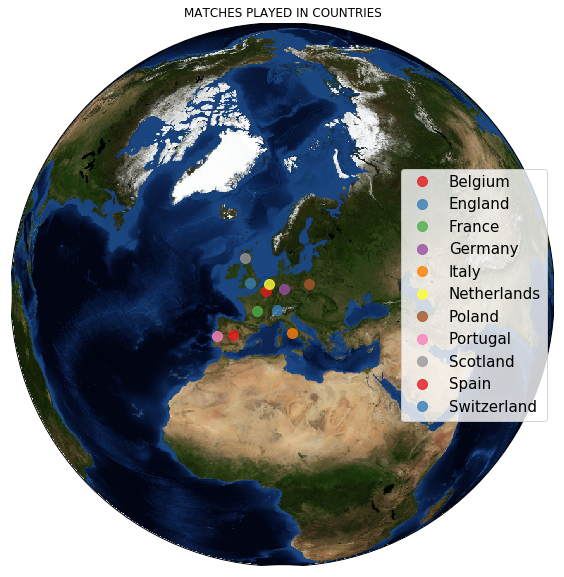

In [26]:
m3 = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=10)

plt.figure(figsize=(10,10))

country = list(country_data["country"].unique())
c       = sns.color_palette("Set1",11)
label   = country

def function(country,c,label):
    lat = list(country_data[country_data["country"] == country].latitude)
    lon = list(country_data[country_data["country"] == country].longitude)
    x,y = m3(lon,lat)
    m3.plot(x,y,"o",markersize=10,color=j,alpha=.8,label=i)

for i,j in zip(country,c):
    function(i,j,i)

m3.bluemarble(scale=0.5)
plt.legend(loc="center right",frameon=True,prop={"size":15}).get_frame().set_facecolor("white")
plt.title("MATCHES PLAYED IN COUNTRIES")
plt.show()

### Leagues in different countries

Same as the above graph but with a different projection.

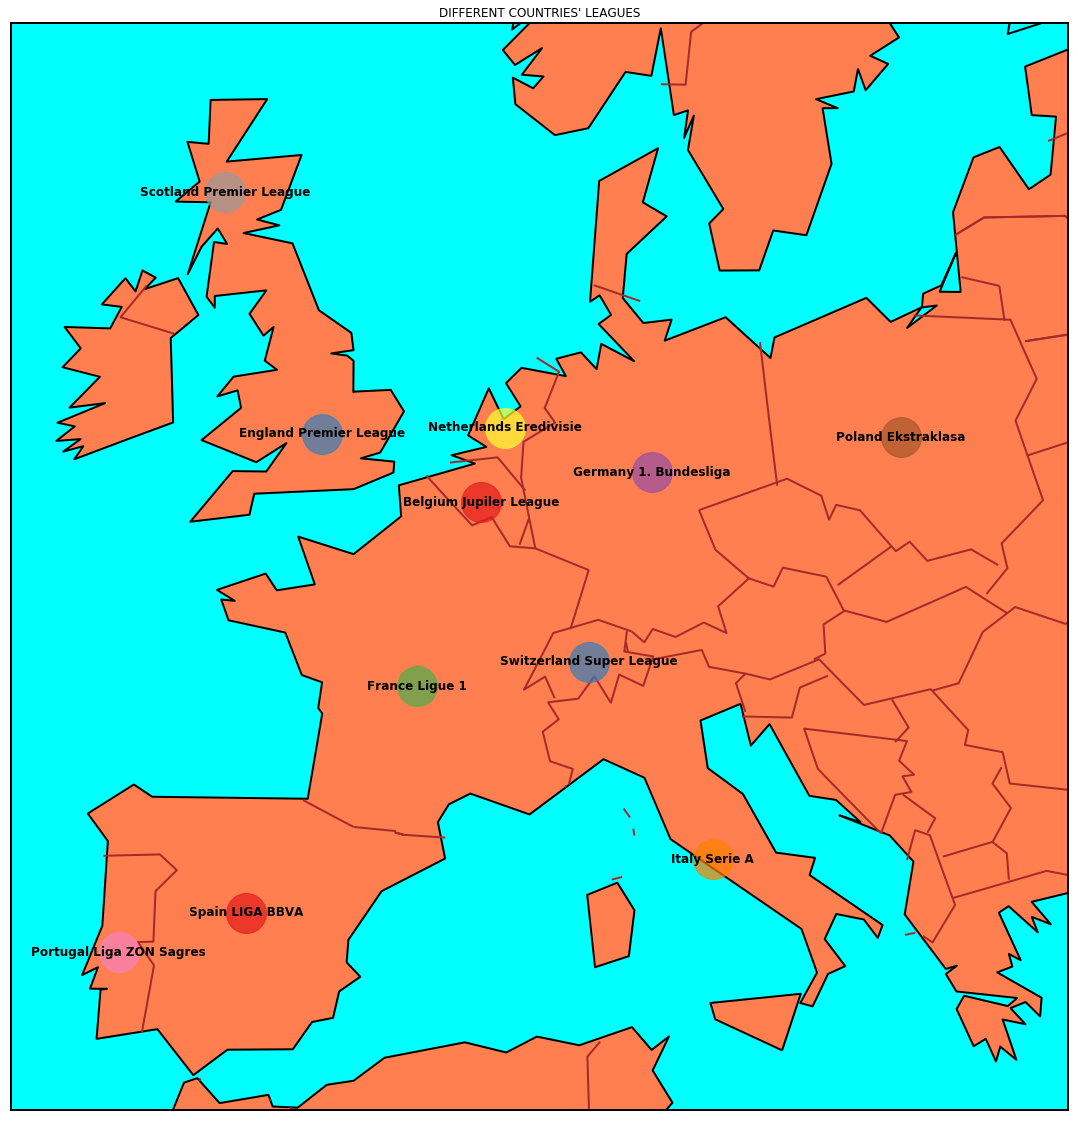

In [27]:
league_map = Basemap(projection='merc', llcrnrlat=35, urcrnrlat=60, llcrnrlon=-12, urcrnrlon=25, lat_ts=20)

plt.figure(figsize=(20, 20))

league_map.drawmapboundary(fill_color='aqua', color='k', linewidth=2)
league_map.drawcoastlines(linewidth=2)
league_map.drawcountries(linewidth=2, color="brown")
league_map.fillcontinents(color='coral', lake_color='b', alpha=1)

league = list(country_data["league"].unique())
c = sns.color_palette("Set1", 11)
label = league
lat = list(country_data[country_data["league"] == league].latitude)
lon = list(country_data[country_data["league"] == league].longitude)
x,y  = league_map(lon,lat)

def function(league, c, label):
    lat = list(country_data[country_data["league"] == league].latitude)
    lon = list(country_data[country_data["league"] == league].longitude)
    x,y = league_map(lon,lat)
    league_map.plot(x, y, "o", markersize=40, color=j, alpha=0.7, label=i)
    
for i,j in zip(league, c):
    function(i,j,i)
    
for i,j,k in itertools.zip_longest(x, y, country_data["league"]):
    plt.text(i, j, k, fontsize=12, color='k', horizontalalignment='center', verticalalignment='center', weight="bold")

plt.title("DIFFERENT COUNTRIES' LEAGUES")
plt.show()